# Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### Plotting the data

In [1]:
#Análisis de datos
import pandas as pd
import numpy as np

#Visualización 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Population of City in 10,000s','Profit in $10,000s']
df = pd.read_csv('ex1data1.txt', header=None, names=headers)
df.head()

,"Population of City in 10,000s","Profit in $10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


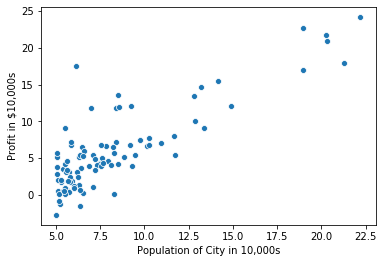

In [2]:
#Particionamos nuestra base de datos
m,n = df.shape #number of training examples
df.insert(0, "0's", np.ones((m,1)), True) #Add a column of ones to x
X = df[["0's", "Population of City in 10,000s"]].values
y = df['Profit in $10,000s'].values.reshape((m,1))

#Visualización
ax = sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], data=df)

### Gradient Descent
In this section, you will fit the linear regression parameters to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function:

$$ J\left(\theta \right)=\frac{1}{2m}\sum_{i=1}^m {\left(h_{\theta \;} \left(x^{\left(i\right)} \right)-y^{\left(i\right)} \right)}^2$$

where the hypothesis $h_{\theta}(x)$  is given by the linear model

$$ h_{\theta } \left(x\right)=\theta^T x=\theta_0 +\theta_1 x_1 $$

One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j :=\theta_j -\alpha \frac{\;1}{m}\sum_{i=1}^m \;\left(h_{\theta \;} \left(x^{\left(i\right)} \right)-y^{\left(i\right)} \right)x_j^{\left(i\right)} \;\;\;\;\;\;\;\left(\mathrm{simultaneously}\;\mathrm{update}\;\theta_{j\;} \;\mathrm{for}\;\mathrm{all}\;j\right) $$

With each step of gradient descent, your parameters  come closer to the optimal values that will achieve the lowest cost.

### Implementation

In [3]:
theta = np.zeros((n,1)) #initialize fitting parameters
iterations = 1500
alpha = 0.01

As you perform gradient descent to minimize the cost function , it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  so you can check the convergence of your gradient descent implementation.

### Computing the cost 

In [4]:
#Cost function
def computeCost(x, y, theta):
    m = len(x)
    hypoth = x @ theta;
    a = hypoth - y;
    return ((a.T @ a)/ (2 * m)).ravel()

computeCost(X, y, theta)

array([32.07273388])

Next we call computeCost again, this time with non-zero theta values as an additional test. You should expect to see an output of 54.24 below:

In [5]:
#Compute and display initial cost with non-zero theta
computeCost(X, y,[[-1],[2]])

array([54.24245508])

### Gradient descent

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost  is parameterized by the vector , not  and . That is, we minimize the value of  by changing the values of the vector , not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of J and check that it is decreasing with each step. Assuming you have implemented gradient descent and computeCost correctly, your value of  should never increase, and should converge to a steady value by the end of the algorithm.

Your final values for  will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [6]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_hist =[]
    
    for i in range(num_iters):
        hypoth = x @ theta
        error = x.T @ (hypoth - y)
        descent = alpha * error * (1/m);
        theta = theta - descent
        J_hist.append(computeCost(x,y,theta))
    
    return theta, J_hist

In [7]:
theta, J_history = gradientDescent(X,y,theta,0.01,1500)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


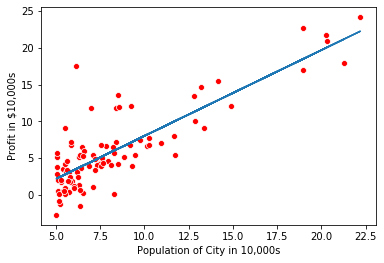

In [18]:
#Plotting the linear fit
linear_func = lambda x: x @ theta
ax = sns.scatterplot(x=df['Population of City in 10,000s'], 
                     y=df['Profit in $10,000s'],color="r", data=df)
plt.plot(df['Population of City in 10,000s'], linear_func(X))

It is also possible to enhance a scatterplot to include a linear regression model (and its uncertainty) using $lmplot()$:

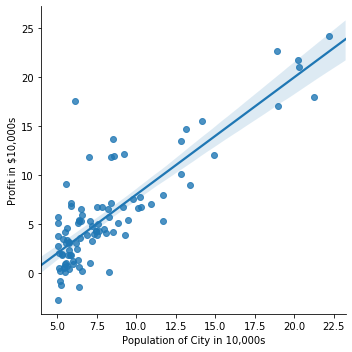

In [22]:
sns.lmplot(x="Population of City in 10,000s", y="Profit in $10,000s",data=df)